In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import date

# You can configure the format of the images: ‘png’, ‘retina’, ‘jpeg’, ‘svg’, ‘pdf’.
%config InlineBackend.figure_format = 'svg'
# this statement allows the visuals to render within your Jupyter Notebook
%matplotlib inline
df = pd.read_csv('new_york_city.csv')


In [3]:
# Let's create a colunm of the age 
df['age']= -df['Birth Year']+date.today().year

In [4]:
# Let's drop unwanted colunm 
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df.drop(['Birth Year'],axis=1,inplace=True)

df.columns

Index(['Start Time', 'End Time', 'Trip Duration', 'Start Station',
       'End Station', 'User Type', 'Gender', 'age'],
      dtype='object')

In [5]:
# let's check missing data.
df.isna().sum()

Start Time           0
End Time             0
Trip Duration        0
Start Station        0
End Station          0
User Type          692
Gender           29209
age              28220
dtype: int64

In [6]:
# Let's fill the missing value of the age with total mean of all ages. 
Age_avg = df.age.mean()
df.age.fillna(Age_avg,inplace=True)

# For the purpose of advertisement, we need to know the average age for bike’s riders and what is their gender. 

In [7]:
# Let's check how many rows are empty in the gender rows.
Num_null= df['Gender'].isna().sum()
 # let see how mush is Num_null with respect to the total data.
Num_null/df.shape[0]

0.09736333333333333

In [8]:
# since it's only 9.73%, it's a reasnable assumatption to drop those rows. 
df.dropna(inplace=True)
df.isnull().sum()
df.shape

(270111, 8)

In [9]:
# Let's now divide age into three categories: Young Adults,Mid age Adult,old Adult.
binInterval = [18,30,45,70,136]
binLabels   = ['Young Adults','Mid age Adult','old Adult','Senior Adult']
df['age cateogery'] = pd.cut(df['age'], bins = binInterval , labels=binLabels)

In [10]:
# we can drop the age colunm after we created the categorization
df.drop(['age'],axis=1,inplace=True)

<AxesSubplot:ylabel='age cateogery'>

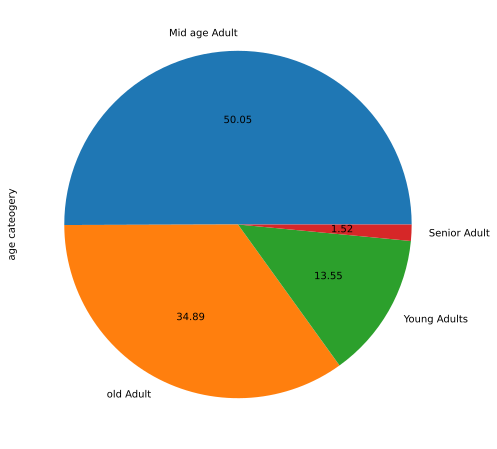

In [11]:
# Let's now plot pie of the age cateogery based on the previous categories.
df['age cateogery'].value_counts().plot.pie(figsize=(8,8), autopct="%.2f")


In [12]:
# But this division does not give much information,let's see where is the most crowded stations
x=df.groupby('Start Station')['Gender'].value_counts().sort_values(ascending=False)
x

Start Station            Gender
Pershing Square North    Male      2566
Broadway & E 22 St       Male      1507
E 17 St & Broadway       Male      1461
W 21 St & 6 Ave          Male      1444
8 Ave & W 31 St          Male      1411
                                   ... 
Adventures NYC           Female       1
NYCBS Depot - GOW        Female       1
3 Ave & Schermerhorn St  Female       1
21 St & 41 Ave           Female       1
NYCBS Depot - PIT        Male         1
Name: Gender, Length: 1276, dtype: int64

In [13]:
u=df['Start Station'].value_counts()
u=u.to_frame()


<Figure size 432x288 with 0 Axes>

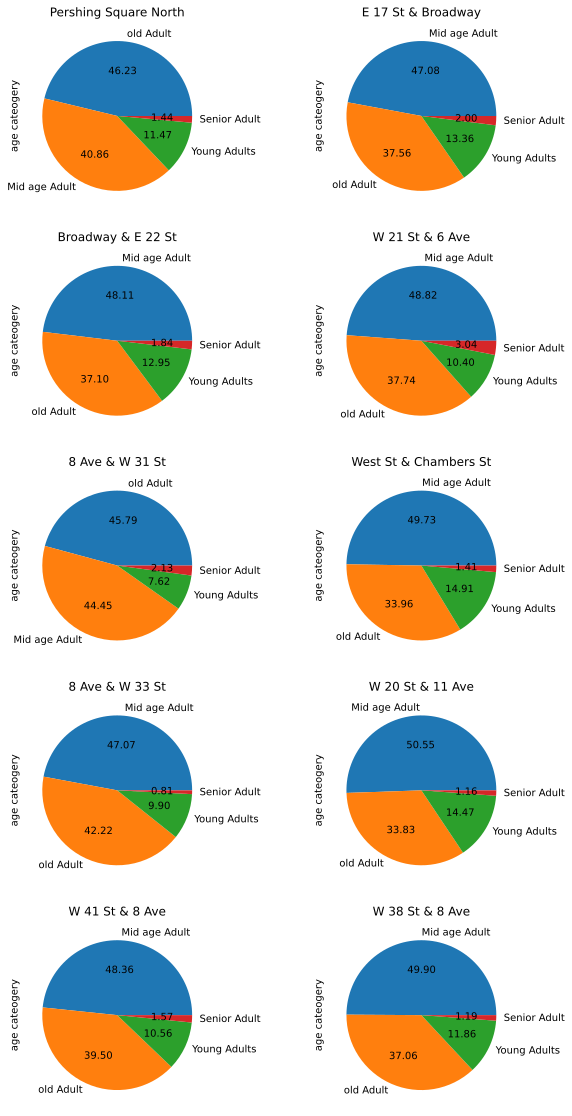

In [14]:
# Here we need to know what are the age caterogeries percentage in each station for the top ten stations.  
plt.suptitle('Main Title',fontsize = 7)
plt.figure(figsize=[10,1])
for x in range(10):
    plt.subplot(5,2,x+1)
    y=df[df['Start Station']==u.index[x]]
    y['age cateogery'].value_counts().plot.pie(figsize=(10,20), autopct="%.2f")
    plt.title(u.index[x])

<Figure size 432x288 with 0 Axes>

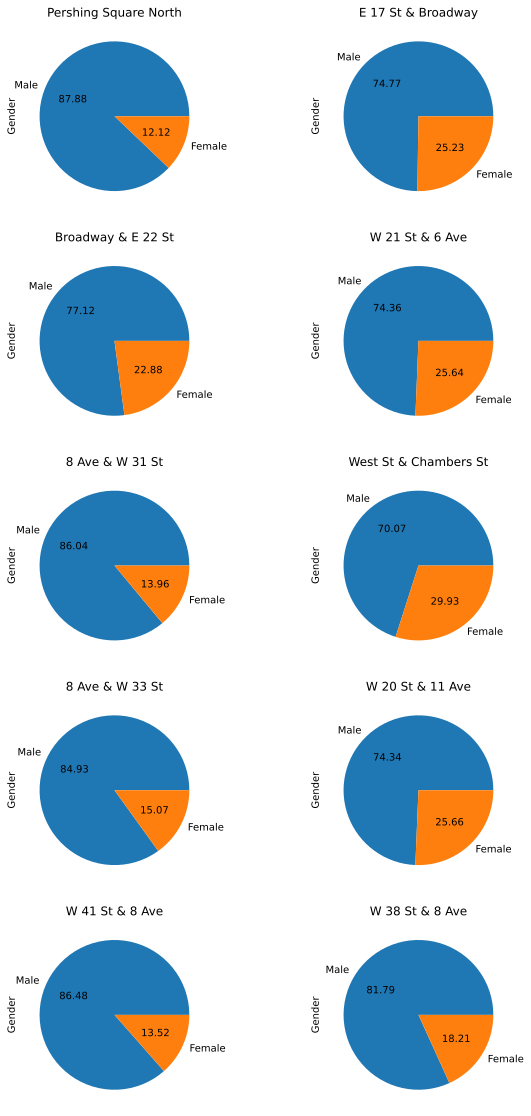

In [15]:
# Here we need to know what are the gender percentage in each station for the top ten station.
plt.suptitle('Main Title',fontsize = 7)
plt.figure(figsize=[10,1])
for x in range(10):
    plt.subplot(5,2,x+1)
    y=df[df['Start Station']==u.index[x]]
    y['Gender'].value_counts().plot.pie(figsize=(10,20), autopct="%.2f")
    plt.title(u.index[x])

# We need to know which trips are the longest trips and from which start stations to provide more bikes into those stations by taking in consideration that the bike whether it is returned into the same station or returned on other station to minimize the lack of bikes in those stations.


In [16]:
df

,Start Time,End Time,Trip Duration,Start Station,End Station,User Type,Gender,age cateogery
0,6/11/2017 14:55,6/11/2017 15:08,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,Young Adults
1,5/11/2017 15:30,5/11/2017 15:41,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,Mid age Adult
2,3/29/2017 13:26,3/29/2017 13:48,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,Mid age Adult
3,5/8/2017 19:47,5/8/2017 19:59,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,Mid age Adult
4,6/21/2017 7:49,6/21/2017 7:54,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,Young Adults
...,...,...,...,...,...,...,...,...
299995,4/24/2017 17:51,4/24/2017 17:59,495,W 25 St & 6 Ave,W 38 St & 8 Ave,Subscriber,Male,Mid age Adult
299996,4/28/2017 12:02,4/28/2017 12:19,994,W 27 St & 7 Ave,W 52 St & 5 Ave,Subscriber,Male,old Adult
299997,5/31/2017 9:11,5/31/2017 9:24,785,3 Ave & E 72 St,W 44 St & 5 Ave,Subscriber,Male,old Adult
299998,1/5/2017 8:31,1/5/2017 8:51,1164,Columbia St & Kane St,Barclay St & Church St,Subscriber,Male,old Adult


In [17]:
# Here are the longest poupler trips
df.groupby('Start Station')['Trip Duration'].value_counts().sort_values(ascending=False)

Start Station          Trip Duration
Pershing Square North  509              13
                       481              12
W 21 St & 6 Ave        484              11
Pershing Square North  380              10
                       407              10
                                        ..
E 25 St & 2 Ave        1281              1
                       1282              1
                       1291              1
                       1321              1
York St & Jay St       11689             1
Name: Trip Duration, Length: 206919, dtype: int64

In [18]:
# Here are the longest poupler trips from the same start and end stations.
df.groupby(['Start Station','End Station'])['Trip Duration'].value_counts().sort_values(ascending=False)

Start Station        End Station             Trip Duration
E 7 St & Avenue A    Cooper Square & E 7 St  264              5
Broadway & Berry St  Broadway & Roebling St  126              4
W 37 St & 5 Ave      Broadway & W 32 St      147              4
Broadway & Berry St  Broadway & Roebling St  106              4
E 7 St & Avenue A    Cooper Square & E 7 St  290              4
                                                             ..
E 15 St & 3 Ave      E 3 St & 1 Ave          904              1
                                             1598             1
                     E 30 St & Park Ave S    327              1
                                             379              1
York St & Jay St     York St & Jay St        2262             1
Name: Trip Duration, Length: 265974, dtype: int64

In [19]:
 # Here are the most poupler trip in terms of start and end stations. 
df.groupby('Start Station')['End Station'].value_counts().sort_values(ascending=False)

Start Station               End Station                  
E 7 St & Avenue A           Cooper Square & E 7 St           166
Pershing Square North       W 33 St & 7 Ave                   99
Greenwich Ave & Charles St  Greenwich Ave & Charles St        94
W 21 St & 6 Ave             9 Ave & W 22 St                   88
Cooper Square & E 7 St      E 7 St & Avenue A                 86
                                                            ... 
Kingston Ave & Herkimer St  7 Ave & Park Pl                    1
                            Albany Ave & Fulton St             1
                            Berkeley Pl & 7 Ave                1
                            Broadway & Whipple St              1
York St & Jay St            Willoughby Ave & Tompkins Ave      1
Name: End Station, Length: 81942, dtype: int64

In [20]:
most_common_start_station = df['Start Station'].value_counts().idxmax()
print("The most commonly used start station :", most_common_start_station)

The most commonly used start station : Pershing Square North


# We need to know when the most common month, day and hour for all trips are,to take the opportunity in the free traffic time for performing maintenance on the bikes. 


In [21]:
# Let's seperate the the start time into Date and time 
df['start_date'] =pd.to_datetime(df['Start Time']).dt.date
df['start_time'] =pd.to_datetime(df['Start Time']).dt.time
df['End_date'] =pd.to_datetime(df['End Time']).dt.date
df['End_time'] =pd.to_datetime(df['End Time']).dt.time
# Let's seperate the date into day, month and year.
df['Starting Day'] = pd.DatetimeIndex(df['start_date']).day
df['Starting Month'] = pd.DatetimeIndex(df['start_date']).month
df['Starting Year'] = pd.DatetimeIndex(df['start_date']).year
df['End_day'] = pd.DatetimeIndex(df['End_date']).day
df['End_month'] = pd.DatetimeIndex(df['End_date']).month
df['End_year'] = pd.DatetimeIndex(df['End_date']).year


In [22]:
# Let's drop the unneccesry colunms. 
df.drop(['start_date'],axis=1,inplace=True)
df.drop(['End_date'],axis=1,inplace=True)
df.drop(['Starting Year'],axis=1,inplace=True)
df.drop(['End_year'],axis=1,inplace=True)
df.drop(['Start Time'],axis=1,inplace=True)
df.drop(['End Time'],axis=1,inplace=True)


In [23]:
# Now replace the months number with its name.
df['Starting Month'].replace({1: "January",2:"February", 3:"March", 4:"April", 5:"May", 6:"June"}, inplace=True)
df


,Trip Duration,Start Station,End Station,User Type,Gender,age cateogery,start_time,End_time,Starting Day,Starting Month,End_day,End_month
0,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,Young Adults,14:55:00,15:08:00,11,June,11,6
1,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,Mid age Adult,15:30:00,15:41:00,11,May,11,5
2,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,Mid age Adult,13:26:00,13:48:00,29,March,29,3
3,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,Mid age Adult,19:47:00,19:59:00,8,May,8,5
4,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,Young Adults,07:49:00,07:54:00,21,June,21,6
...,...,...,...,...,...,...,...,...,...,...,...,...
299995,495,W 25 St & 6 Ave,W 38 St & 8 Ave,Subscriber,Male,Mid age Adult,17:51:00,17:59:00,24,April,24,4
299996,994,W 27 St & 7 Ave,W 52 St & 5 Ave,Subscriber,Male,old Adult,12:02:00,12:19:00,28,April,28,4
299997,785,3 Ave & E 72 St,W 44 St & 5 Ave,Subscriber,Male,old Adult,09:11:00,09:24:00,31,May,31,5
299998,1164,Columbia St & Kane St,Barclay St & Church St,Subscriber,Male,old Adult,08:31:00,08:51:00,5,January,5,1


In [24]:
# Let's check if all trips are done in the same days or not.
# if they match this means all trips are perfomed in the same days. and by this information we can drop 
# the columns End_day & End_month which they don't give much of information. 
count=0
i=0
Not_same_day=0
d=[]
End_day = df['End_day'].tolist()
Starting_Day = df['Starting Day'].tolist()
Starting_Day = df['Starting Day'].tolist()
while i < len(df):
    if End_day[i] == Starting_Day[i]:
        count+=1
    else:
        Not_same_day+=1
        d.append(i)
    i+=1
Not_same_day/(Not_same_day+count)


0.0026100380954496485

In [25]:
# After we went into the previous operation, we notice that onlu 0.2% of the days that the trip took more 
#than day to be accompliched . Hence, we need to drop these terms these outliers. 
df.reset_index(inplace=True)
df=df.drop(d)
 

In [26]:
# Let's drop the unnecssery colunms from 
df.drop(['End_day'],axis=1,inplace=True)
df.drop(['End_month'],axis=1,inplace=True)
df.drop(['End_time'],axis=1,inplace=True)
df.rename(columns={"Starting Day": "Day", "Starting Month": "Month"},inplace=True)
    


In [27]:
# Now let's orgnize the colunms 
df = df[['Day', 'Month', 'start_time','Trip Duration','Start Station','End Station','User Type','Gender','age cateogery']]

In [28]:
# Now let's work on the time. We need to label the time by septarte it into four parts: Morning, Afternoon, Evening and Night.
x=df['start_time'].apply(str) # convert it into a string
x= x.tolist()# Make it a list 
y=[]
# convert the string in the list into an intger.
for i in range(len(x)):
    y.append(int(x[i].split(":")[0]))
# Now let's make the labeling 
binInterval = [0,4,11,18,23]
binLabels   = ['Night','Morning','Afternoon','Evening']
df["Parts of the Day"] = pd.cut(y, bins = binInterval , labels=binLabels)

In [29]:
# Since we made the labeling, let's drop the start_time column
#df.drop(['start_time'],axis=1,inplace=True)
# Now let's orgnize the colunms 
df = df[['Day', 'Month', 'Parts of the Day','Trip Duration','Start Station','End Station','User Type','Gender','age cateogery']]

In [30]:
df.groupby('Month')['Day'].value_counts()

Month  Day
April  28     2439
       11     2257
       18     2114
       12     2087
       13     2081
              ... 
May    5      1028
       22     1000
       29      946
       25      752
       13      212
Name: Day, Length: 177, dtype: int64

Text(0.5, 1.0, 'June')

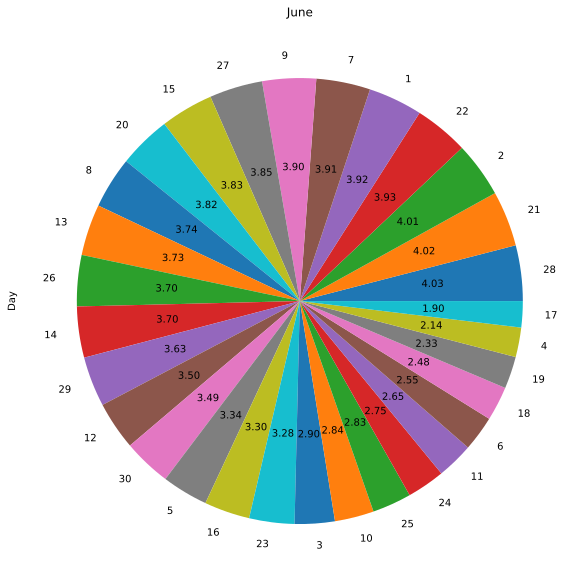

In [31]:
y=df[df['Month']=='June']
y['Day'].value_counts().plot.pie(figsize=(10,20), autopct="%.2f")
plt.title('June')

Text(0.5, 1.0, 'The months Pie Plot')

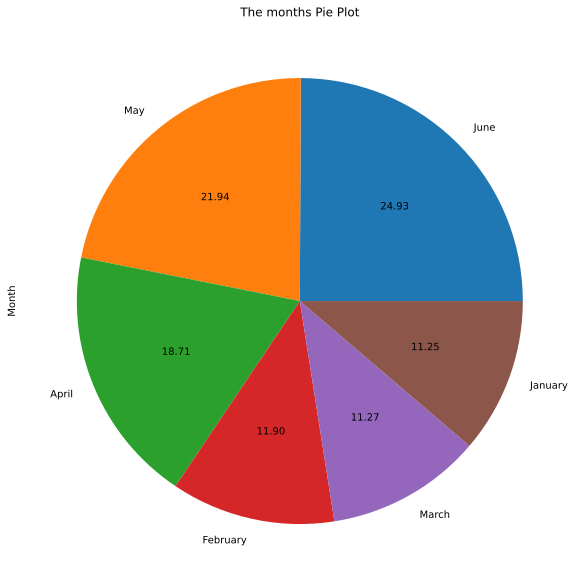

In [32]:

df['Month'].value_counts().plot.pie(figsize=(10,20), autopct="%.2f")
plt.title('The months Pie Plot')

In [33]:
df['Month'].value_counts()

June        67162
May         59106
April       50408
February    32056
March       30372
January     30302
Name: Month, dtype: int64

Text(0.5, 1.0, 'Days')

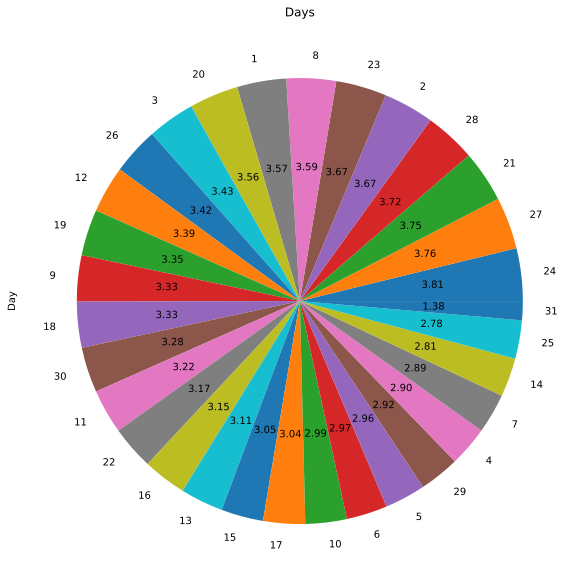

In [34]:
df['Day'].value_counts().plot.pie(figsize=(10,20), autopct="%.2f")
plt.title('Days')


Text(0.5, 1.0, 'Time')

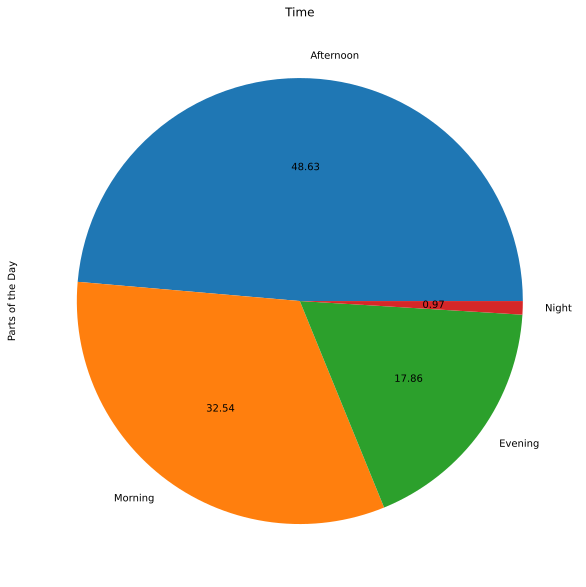

In [35]:
df['Parts of the Day'].value_counts().plot.pie(figsize=(10,20), autopct="%.2f")
plt.title('Time')

In [36]:
df['Parts of the Day'].value_counts()

Afternoon    129958
Morning       86966
Evening       47724
Night          2605
Name: Parts of the Day, dtype: int64

,Day,Month,Parts of the Day,Trip Duration,Start Station,End Station,User Type,Gender,age cateogery
0,11,June,Afternoon,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,Young Adults
1,11,May,Afternoon,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,Mid age Adult
2,29,March,Afternoon,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,Mid age Adult
3,8,May,Evening,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,Mid age Adult
4,21,June,Morning,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,Young Adults
...,...,...,...,...,...,...,...,...,...
270106,24,April,Afternoon,495,W 25 St & 6 Ave,W 38 St & 8 Ave,Subscriber,Male,Mid age Adult
270107,28,April,Afternoon,994,W 27 St & 7 Ave,W 52 St & 5 Ave,Subscriber,Male,old Adult
270108,31,May,Morning,785,3 Ave & E 72 St,W 44 St & 5 Ave,Subscriber,Male,old Adult
270109,5,January,Morning,1164,Columbia St & Kane St,Barclay St & Church St,Subscriber,Male,old Adult


# Let's look at the data from the finaical perspective, giving the first six months on the year, we need to predict the trip duration from the day. This will give us an idea about how much are going to profite in each day in order to decide abou the offers for the next months. For example,  if we offer a ride for  15 min to 3 dollars and next  
